In [2]:
import sys
if ".." not in sys.path:
    sys.path.insert(0, "..")

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from cobra.io import read_sbml_model

model = read_sbml_model("../model/Rpom_05.xml")

ex_glc = model.reactions.get_by_id("EX_glc")
ex_ace = model.reactions.get_by_id("EX_ac")

atpm = model.reactions.get_by_id("ATPM")

https://identifiers.org/stem/ does not conform to 'http(s)://identifiers.org/collection/id' or'http(s)://identifiers.org/COLLECTION:id
https://identifiers.org/stem/ does not conform to 'http(s)://identifiers.org/collection/id' or'http(s)://identifiers.org/COLLECTION:id
https://identifiers.org/stem/ does not conform to 'http(s)://identifiers.org/collection/id' or'http(s)://identifiers.org/COLLECTION:id
https://identifiers.org/stem/ does not conform to 'http(s)://identifiers.org/collection/id' or'http(s)://identifiers.org/COLLECTION:id
https://identifiers.org/stem/ does not conform to 'http(s)://identifiers.org/collection/id' or'http(s)://identifiers.org/COLLECTION:id
https://identifiers.org/stem/ does not conform to 'http(s)://identifiers.org/collection/id' or'http(s)://identifiers.org/COLLECTION:id
https://identifiers.org/stem/ does not conform to 'http(s)://identifiers.org/collection/id' or'http(s)://identifiers.org/COLLECTION:id
https://identifiers.org/stem/ does not conform to 'http

In [4]:
eth_CoA_rxns = [rxn for rxn in model.reactions if "PWY-5741" in rxn.annotation.get("pathways", [])]

with model:
    ex_ace.lower_bound = -10

    sol = model.optimize()

    print(f"Objective value: {sol.objective_value}")
    for rxn in eth_CoA_rxns:
        print(f"{rxn.id} ({rxn.name}): {sol.fluxes[rxn.id]})")

Objective value: 0.33292862651789035
3-HYDROXBUTYRYL-COA-DEHYDRATASE-RXN (3-HYDROXBUTYRYL-COA-DEHYDRATASE-RXN): 0.0)
ACETYL-COA-ACETYLTRANSFER-RXN (ACETYL-COA-ACETYLTRANSFER-RXN): 0.3100051728745697)
MALATE--COA-LIGASE-RXN (MALATE--COA-LIGASE-RXN): -0.00022272923900267533)
MALYL-COA-LYASE-RXN (MALYL-COA-LYASE-RXN): 0.00022272923900267536)
RXN-16391 (RXN-16391): 1.7406748643111782e-14)
RXN-5901 (RXN-5901): 0.0)
RXN-8957 (RXN-8957): 0.0)
RXN-8958 (RXN-8958): 1.7406748643111782e-14)
RXN-8959 (RXN-8959): 1.7406748643111782e-14)
RXN-8960 (RXN-8960): 1.7387605382822558e-14)
RXN-8961 (RXN-8961): 1.7387605382822555e-14)


(<networkx.classes.digraph.DiGraph at 0x7f75d3017b30>, <Axes: >)

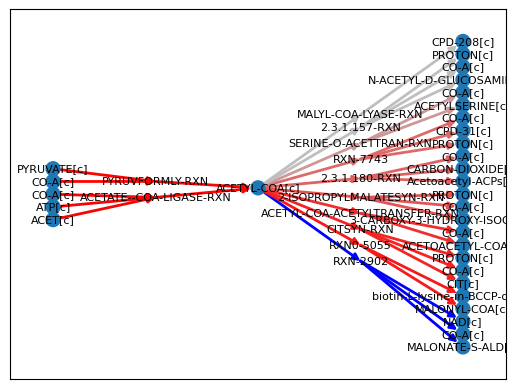

In [5]:
from plotting.diagnostic import uptakes_and_secretions, plot_pathway, plot_metabolite_fluxes


plot_metabolite_fluxes(
    model,
    "ACETYL-COA[c]",
    label_reactions="name",
    include_zeros=False
)

(<networkx.classes.digraph.DiGraph at 0x7f75d382a7e0>, <Axes: >)

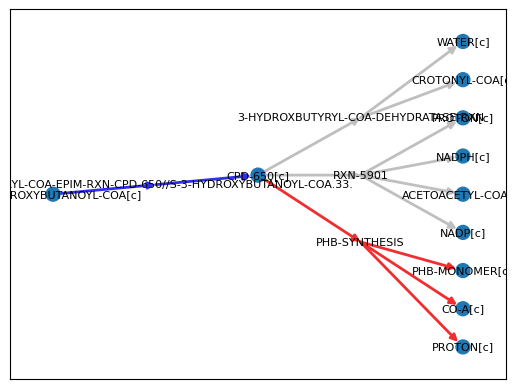

In [6]:
plot_metabolite_fluxes(
    model,
    "CPD-650[c]",
    label_reactions="name",
    include_zeros=True
)

In [7]:
# model.reactions.get_by_id("RXN0-5055")
model.reactions.get_by_id("BIOTIN-CARBOXYL-RXN")

Reaction identifier,BIOTIN-CARBOXYL-RXN
Name,BIOTIN-CARBOXYL-RXN
Memory address,0x7f75d40077a0
Stoichiometry,ATP[c] + HCO3[c] + biotin-L-lysine-in-BCCP-dimers[c] --> ADP[c] + PROTON[c] + Pi[c] + carboxybiotin-L-lysine-in-BCCP-dimers[c] ATP + hydrogencarbonate + a [biotin carboxyl-carrier-protein dimer]-N6-biotinyl-L-lysine --> ADP + H+ + phosphate + a [carboxyl-carrier protein dimer]-N6-carboxybiotinyl-L-lysine
GPR,G1RHL-397 or SPO1010
Lower bound,0.0
Upper bound,1000.0


In [8]:
for rxn in model.metabolites.get_by_id("S-3-HYDROXYBUTANOYL-COA[c]").reactions:
    print(f"{rxn.id}: {rxn.flux}\n\t{rxn.reaction}")

RXN-11662: -0.31000517287456963
	NAD[c] + S-3-HYDROXYBUTANOYL-COA[c] <=> ACETOACETYL-COA[c] + NADH[c] + PROTON[c]
RXN-11667: 0.0
	S-3-HYDROXYBUTANOYL-COA[c] <=> CROTONYL-COA[c] + WATER[c]
OHBUTYRYL-COA-EPIM-RXN-CPD-650//S-3-HYDROXYBUTANOYL-COA.33.: -0.31000517287455226
	CPD-650[c] <=> S-3-HYDROXYBUTANOYL-COA[c]
3-HYDROXYBUTYRYL-COA-DEHYDROGENASE-RXN: 0.0
	ACETOACETYL-COA[c] + NADPH[c] + PROTON[c] --> NADP[c] + S-3-HYDROXYBUTANOYL-COA[c]


In [9]:
model.reactions.get_by_id("PHB-SYNTHESIS")

Reaction identifier,PHB-SYNTHESIS
Name,PHB synthesis from (3R)-3-hydroxybutanoyl-CoA
Memory address,0x7f75d399cf20
Stoichiometry,CPD-650[c] --> CO-A[c] + PHB-MONOMER[c] + PROTON[c] (3R)-3-hydroxybutanoyl-CoA --> coenzyme A + PHB monomer ((3R)-3-hydroxybutanoyl) + H+
GPR,
Lower bound,0.0
Upper bound,1000.0


(<networkx.classes.digraph.DiGraph at 0x7f75d05c2150>, <Axes: >)

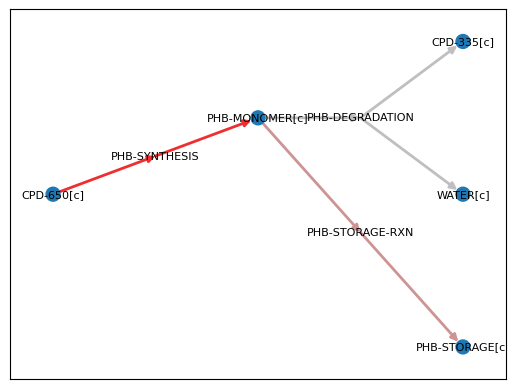

In [10]:
plot_metabolite_fluxes(
    model,
    "PHB-MONOMER[c]",
    label_reactions="name",
    include_zeros=True
)

In [11]:
for rxn in model.metabolites.get_by_id("PHB-MONOMER[c]").reactions:
    print(f"{rxn.id}: {rxn.flux}\n\t{rxn.reaction}")

PHB-SYNTHESIS: 0.3100051728745522
	CPD-650[c] --> CO-A[c] + PHB-MONOMER[c] + PROTON[c]
PHB-DEGRADATION: 0.0
	PHB-MONOMER[c] + WATER[c] --> CPD-335[c]
PHB-STORAGE-RXN: 0.030420639782025596
	10.19061976 PHB-MONOMER[c] --> PHB-STORAGE[c]


(<networkx.classes.digraph.DiGraph at 0x7f75d064e480>, <Axes: >)

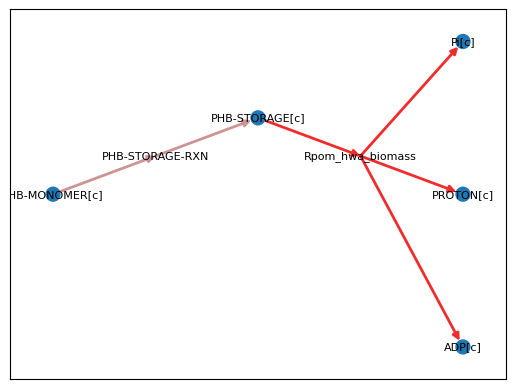

In [12]:
plot_metabolite_fluxes(
    model,
    "PHB-STORAGE[c]",
    label_reactions="name",
    include_zeros=True
)

(<networkx.classes.digraph.DiGraph at 0x7f75d04c6480>, <Axes: >)

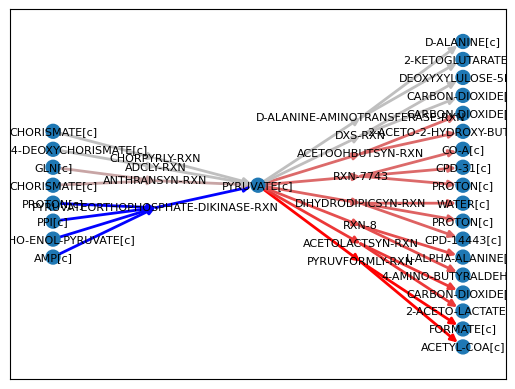

In [13]:
# Weirdly, all aceto-acetyl-CoA is diverted to PHB synthesis.
# Something is probably wrong in core metabolism.
# Earlier, I noticed that there's some acetyl-CoA coming from pyruvate.
# Where is the pyruvate coming from?

plot_metabolite_fluxes(
    model,
    "PYRUVATE[c]",
    label_reactions="name",
    include_zeros=False
)

(<networkx.classes.digraph.DiGraph at 0x7f75d03b7260>, <Axes: >)

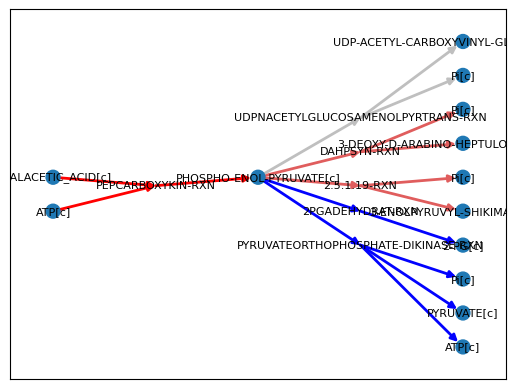

In [14]:
# Pyruvate is coming from phosphoenolpyruvate, but not from the 
# pyruvate kinase reaction as in glucose metabolism.
plot_metabolite_fluxes(
    model,
    "PHOSPHO-ENOL-PYRUVATE[c]",
    label_reactions="name",
    include_zeros=False
)

In [15]:
model.reactions.get_by_id("PEPCARBOXYKIN-RXN")

Reaction identifier,PEPCARBOXYKIN-RXN
Name,PEPCARBOXYKIN-RXN
Memory address,0x7f75d3e86150
Stoichiometry,ATP[c] + OXALACETIC_ACID[c] --> ADP[c] + CARBON-DIOXIDE[c] + PHOSPHO-ENOL-PYRUVATE[c] ATP + oxaloacetate --> ADP + CO2 + phosphoenolpyruvate
GPR,SPO0709
Lower bound,0.0
Upper bound,1000.0


(<networkx.classes.digraph.DiGraph at 0x7f75d0468830>, <Axes: >)

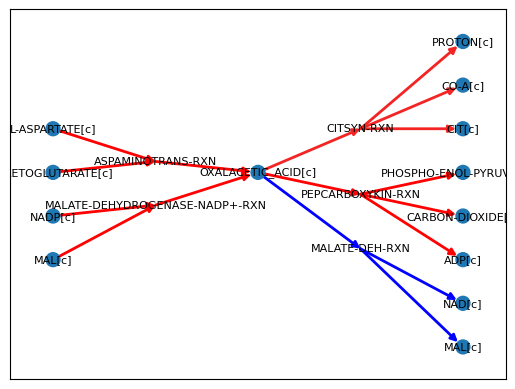

In [16]:
# PEP is coming from oxaloacetate, which is coming from...

plot_metabolite_fluxes(
    model,
    "OXALACETIC_ACID[c]",
    label_reactions="name",
    include_zeros=False
)

In [17]:
for rxn in model.metabolites.get_by_id("OXALACETIC_ACID[c]").reactions:
    print(f"{rxn.id}: {rxn.flux}\n\t{rxn.reaction}")

RXN-7929: 0.0
	3S-CITRYL-COA[c] <=> ACETYL-COA[c] + OXALACETIC_ACID[c]
1.4.1.21-RXN-L-ASPARTATE/NAD/WATER//OXALACETIC_ACID/AMMONIUM/NADH/PROTON.60.: 0.0
	L-ASPARTATE[c] + NAD[c] + WATER[c] <=> AMMONIUM[c] + NADH[c] + OXALACETIC_ACID[c] + PROTON[c]
PYRUVATE-CARBOXYLASE-RXN: 0.0
	ATP[c] + HCO3[c] + PYRUVATE[c] --> ADP[c] + OXALACETIC_ACID[c] + PROTON[c] + Pi[c]
RXN-21228: 0.0
	CPD-22847[c] + OXALACETIC_ACID[c] + WATER[c] --> CO-A[c] + CPD-22852[c] + PROTON[c]
MALATE-DEH-RXN: -36.29816909658321
	MAL[c] + NAD[c] <=> NADH[c] + OXALACETIC_ACID[c] + PROTON[c]
PEPCARBOX-RXN: 0.0
	HCO3[c] + PHOSPHO-ENOL-PYRUVATE[c] --> OXALACETIC_ACID[c] + Pi[c]
2-METHYLCITRATE-SYNTHASE-RXN: 0.0
	OXALACETIC_ACID[c] + PROPIONYL-COA[c] + WATER[c] --> CO-A[c] + CPD-622[c] + PROTON[c]
CITSYN-RXN: 0.4314166962940387
	ACETYL-COA[c] + OXALACETIC_ACID[c] + WATER[c] --> CIT[c] + CO-A[c] + PROTON[c]
1.4.1.21-RXN-L-ASPARTATE/NADP/WATER//OXALACETIC_ACID/AMMONIUM/NADPH/PROTON.62.: 0.0
	L-ASPARTATE[c] + NADP[c] + WATER[c] <=

(<networkx.classes.digraph.DiGraph at 0x7f75d047e000>, <Axes: >)

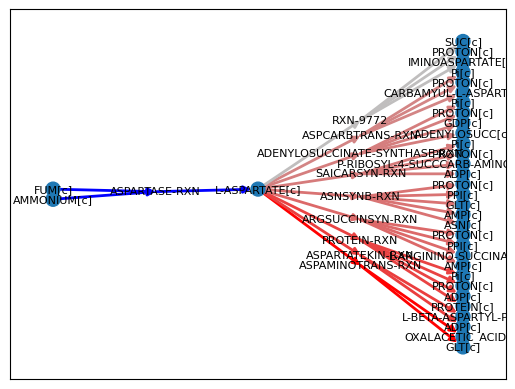

In [18]:
plot_metabolite_fluxes(
    model,
    "L-ASPARTATE[c]",
    label_reactions="name",
    include_zeros=False
)

In [19]:
model.reactions.get_by_id("ASPARTASE-RXN")

Reaction identifier,ASPARTASE-RXN
Name,ASPARTASE-RXN
Memory address,0x7f75d4006240
Stoichiometry,L-ASPARTATE[c] <=> AMMONIUM[c] + FUM[c] L-aspartate <=> ammonium + fumarate
GPR,SPO2663
Lower bound,-1000.0
Upper bound,1000.0


In [20]:
# Try knockouts of the raections introduced by the biocyc ETL, to see if any turn ethylmalonyl-CoA pathway back on.

for rxn in model.reactions:
    # Skip any reactions that are not from the biocyc ETL
    src = rxn.annotation.get("source")
    if src not in ["Ruegeria pomeroyi DSS-3", "Ruegeria pomeroyi DSS-3 representative genome"]:
        continue
    
    # Optimize and check if the ethylmalonyl-CoA pathway is on
    # (use 3-HYDROXBUTYRYL-COA-DEHYDRATASE-RXN as a marker)
    with model:
        ex_ace.lower_bound = -10
        rxn.knock_out()
        sol = model.optimize()
        if sol.fluxes["3-HYDROXBUTYRYL-COA-DEHYDRATASE-RXN"] != 0:
            print(f"Knocking out {rxn.id} ({rxn.name}) turns on the ethylmalonyl-CoA pathway.")



In [21]:
print(model.reactions.get_by_id("RXN-6383").annotation)
model.reactions.get_by_id("RXN-6383")

{'source': 'Ruegeria pomeroyi DSS-3 representative genome'}


Reaction identifier,RXN-6383
Name,
Memory address,0x7f75d3735040
Stoichiometry,3-HYDROXY-PROPIONYL-COA[c] <=> ACRYLYL-COA[c] + WATER[c] 3-hydroxypropanoyl-CoA <=> acryloyl-CoA + H2O
GPR,
Lower bound,-1000.0
Upper bound,1000.0


In [22]:
print(model.reactions.get_by_id("RXN-22218").annotation)
model.reactions.get_by_id("RXN-22218")

{'source': 'Ruegeria pomeroyi DSS-3 representative genome'}


Reaction identifier,RXN-22218
Name,
Memory address,0x7f75d36037d0
Stoichiometry,3-HYDROXY-PROPIONYL-COA[c] + NADP[c] <-- CPD-17259[c] + NADPH[c] + PROTON[c] 3-hydroxypropanoyl-CoA + NADP+ <-- 3-oxopropanoyl-CoA + NADPH + H+
GPR,SPO_RS01655
Lower bound,-1000.0
Upper bound,0.0


(<networkx.classes.digraph.DiGraph at 0x7f75d064f020>, <Axes: >)

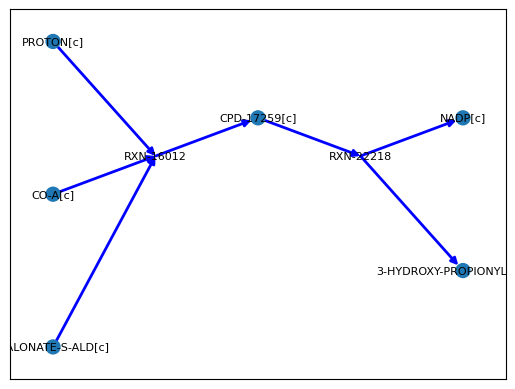

In [23]:
# Reset fluxes just in case
with model:
    ex_ace.lower_bound = -10
    sol = model.optimize()

plot_metabolite_fluxes(
    model,
    "CPD-17259[c]",
    label_reactions="name",
    include_zeros=False
)

(<networkx.classes.digraph.DiGraph at 0x7f75d00c0f20>, <Axes: >)

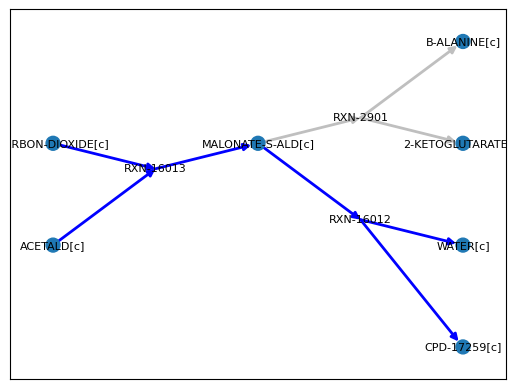

In [24]:

plot_metabolite_fluxes(
    model,
    "MALONATE-S-ALD[c]",
    label_reactions="name",
    include_zeros=False
)

(<networkx.classes.digraph.DiGraph at 0x7f75d016bb30>, <Axes: >)

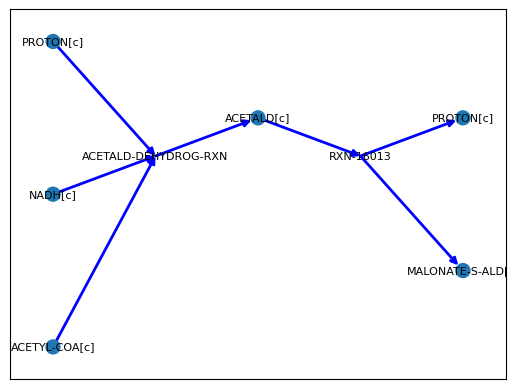

In [25]:
plot_metabolite_fluxes(
    model,
    "ACETALD[c]",
    label_reactions="name",
    include_zeros=False
)

(<networkx.classes.digraph.DiGraph at 0x7f75d018dc70>, <Axes: >)

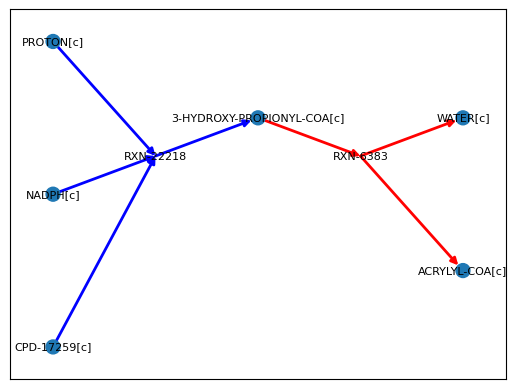

In [26]:
# So 3-oxopropanoyl-CoA ultimately comes from acetyl-CoA, through Acetaldehye, etc.
# Where does it go after 3-HYDROXY-PROPIONYL-COA?
plot_metabolite_fluxes(
    model,
    "3-HYDROXY-PROPIONYL-COA[c]",
    label_reactions="name",
    include_zeros=False
)

(<networkx.classes.digraph.DiGraph at 0x7f75cafbde20>, <Axes: >)

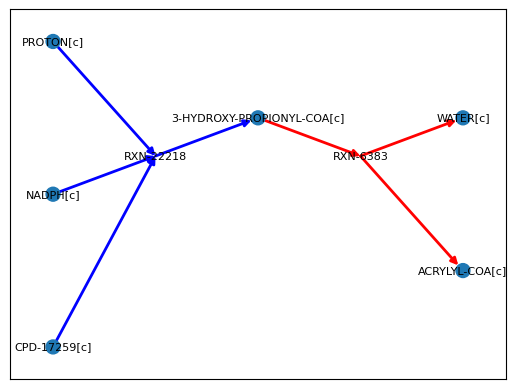

In [27]:
plot_metabolite_fluxes(model,
     "3-HYDROXY-PROPIONYL-COA[c]",
    label_reactions="name",
    include_zeros=True
)

In [28]:
# RXN-6383 is the other newly added reaction that, when knocked out, turns on the ethylmalonyl-CoA pathway.
# It sits in the acrylate degradation (II) pathway downstream of DMSP cleavage, where it probably buffers acryloyl-CoA 
# (by conversion to 3-hydroxy-propionyl-CoA) to prevent buildup of this toxic compound. Reisch et al. (2013) show that
# the fate of 3-hydroxy-propionyl-CoA is to be converted back into acryloyl-CoA, which is then converted to propionyl-CoA.
# That probably rules out any other reactions consuming 3-hydroxy-propionyl-CoA, but not reactions producing it.
# 
# In short, RXN-6383 is almost certainly actually in the organism. RXN-22218 may not be,
# but I've yet to find evidence ruling it out (the above unfortunately falls short).

# To summarize, the ethylmalonyl-CoA pathway is turned off when growing on acetate because:
# 1. Acetate is converted to acetyl-CoA, presumably(?) through the usual acetate-CoA ligase.
# 2. Acetyl-CoA is converted to 3-oxopropanoyl-CoA through:
#    - acetaldehyde dehydrogenase: Acetyl-CoA -> acetaldehyde
#    - methylthioacryloyl-CoA hydratase (dmdD): Acetaldehyde -> MALONATE-S-ALD (3-oxopropanoate) -> CPD-17259 (3-oxopropanoyl-CoA)
#        - ****This is part of the DMSP demethylation pathway running in reverse!****
#          I'm not actually sure if this is possible - let's look into the reversibility of these reactions
# 3. 3-oxopropanoyl-CoA is converted to 3-hydroxypropanoyl-CoA through RXN-22218, which 
#    is a biocyc ETL reaction that is not in the original model. It is catalyzed by acetoacetyl-CoA reductase (phbB)
#    which is a known enzyme in the ethylmalonyl-CoA pathway, where it catalyzes the conversion of acetoacetyl-CoA to 3-hydroxybutanoyl-CoA.
#    **I'm uncertain whether this alternative substrate can actually be processed by phbB.**
# 4. 3-hydroxypropanoyl-CoA is converted to acrylyl-CoA through RXN-6383, which is also a biocyc ETL reaction that is not in the original model.
#    However, it is in the acrylate degradation (II) pathway, which is a known pathway in the organism, so it is probably correct.

In [29]:
# Okay, so I'm proposing the following fixes.
# 1. Make the dmdD-catalyzed reactions irreversible.
# 2. Remove RXN-22218 from the model.
# Either fix works, but I think both make sense provided there's evidence for the dmdD-catalyzed reactions being irreversible.

with model:
    ex_glc.lower_bound = -10

    model.reactions.get_by_id("RXN-12571").bounds = (0, 1000)
    model.reactions.get_by_id("RXN-12572").bounds = (0, 1000)
    model.reactions.get_by_id("RXN-16010").bounds = (0, 1000)
    model.reactions.get_by_id("RXN-16011").bounds = (0, 1000)
    model.reactions.get_by_id("RXN-16012").bounds = (0, 1000)
    model.reactions.get_by_id("RXN-16013").bounds = (0, 1000)
    model.reactions.get_by_id("RXN-22218").knock_out()


    sol = model.optimize()
    print(f"Objective value: {sol.objective_value}")
    for rxn in eth_CoA_rxns:
        print(f"{rxn.id} ({rxn.name}): {sol.fluxes[rxn.id]})")

Objective value: 1.1110515561760557
3-HYDROXBUTYRYL-COA-DEHYDRATASE-RXN (3-HYDROXBUTYRYL-COA-DEHYDRATASE-RXN): 0.0)
ACETYL-COA-ACETYLTRANSFER-RXN (ACETYL-COA-ACETYLTRANSFER-RXN): 1.4963051872062132)
MALATE--COA-LIGASE-RXN (MALATE--COA-LIGASE-RXN): -0.46249722158561)
MALYL-COA-LYASE-RXN (MALYL-COA-LYASE-RXN): 0.46249722158561)
RXN-16391 (RXN-16391): 0.4617539281351038)
RXN-5901 (RXN-5901): 0.0)
RXN-8957 (RXN-8957): 0.4617539281351038)
RXN-8958 (RXN-8958): 0.46175392813510385)
RXN-8959 (RXN-8959): 0.46175392813510385)
RXN-8960 (RXN-8960): 0.4617539281351039)
RXN-8961 (RXN-8961): 0.4617539281351039)


In [30]:
# AHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH
# Running the cell above *SOMETIMES* passes flux through the ethylmalonyl-CoA pathway,
# and sometimes it doesn't. (That is to say, *most* of the ethylmalonyl-CoA pathway is
# turned on, but not all of it - specifically, ACETYL-COA-ACETYLTRANSFER-RXN, MALATE--COA-LIGASE-RXN, and MALYL-COA-LYASE-RXN
# seem to be always utilized, whereas the rest are not.)
# The objective value is approximately the same in either case, so there is an alternative flux distribution
# that is equally good. Let's force zero flux through the sometimes-unused reactions, and see what the alternative flux distribution is.

with model:
    ex_glc.lower_bound = -10

    model.reactions.get_by_id("RXN-12571").bounds = (0, 1000)
    model.reactions.get_by_id("RXN-12572").bounds = (0, 1000)
    model.reactions.get_by_id("RXN-16010").bounds = (0, 1000)
    model.reactions.get_by_id("RXN-16011").bounds = (0, 1000)
    model.reactions.get_by_id("RXN-16012").bounds = (0, 1000)
    model.reactions.get_by_id("RXN-16013").bounds = (0, 1000)
    model.reactions.get_by_id("RXN-22218").knock_out()

    # Force zero flux through the sometimes-unused reactions
    model.reactions.get_by_id("RXN-8957").bounds = (0, 0)


    sol = model.optimize()
    print(f"Objective value: {sol.objective_value}")
    for rxn in eth_CoA_rxns:
        print(f"{rxn.id} ({rxn.name}): {sol.fluxes[rxn.id]})")

Objective value: 1.111051556138656
3-HYDROXBUTYRYL-COA-DEHYDRATASE-RXN (3-HYDROXBUTYRYL-COA-DEHYDRATASE-RXN): 0.0)
ACETYL-COA-ACETYLTRANSFER-RXN (ACETYL-COA-ACETYLTRANSFER-RXN): 1.0345512590362849)
MALATE--COA-LIGASE-RXN (MALATE--COA-LIGASE-RXN): -0.0007432934504810022)
MALYL-COA-LYASE-RXN (MALYL-COA-LYASE-RXN): 0.0007432934504810023)
RXN-16391 (RXN-16391): 0.0)
RXN-5901 (RXN-5901): 0.0)
RXN-8957 (RXN-8957): 0.0)
RXN-8958 (RXN-8958): 0.0)
RXN-8959 (RXN-8959): 0.0)
RXN-8960 (RXN-8960): 0.0)
RXN-8961 (RXN-8961): 0.0)


(<networkx.classes.digraph.DiGraph at 0x7f75cae2e5a0>, <Axes: >)

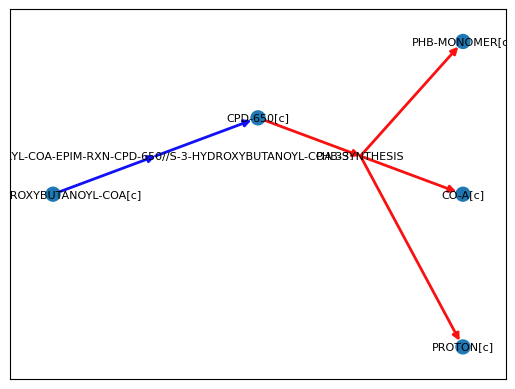

In [31]:
plot_metabolite_fluxes(
    model,
    "CPD-650[c]",
    label_reactions="names",
    include_zeros=False
)

In [32]:
model.reactions.get_by_id("OHBUTYRYL-COA-EPIM-RXN-CPD-650//S-3-HYDROXYBUTANOYL-COA.33.")

Reaction identifier,OHBUTYRYL-COA-EPIM-RXN-CPD-650//S-3-HYDROXYBUTANOYL-COA.33.
Name,OHBUTYRYL-COA-EPIM-RXN-CPD-650//S-3-HYDROXYBUTANOYL-COA.33.
Memory address,0x7f75d3e4f860
Stoichiometry,CPD-650[c] <=> S-3-HYDROXYBUTANOYL-COA[c] (3R)-3-hydroxybutanoyl-CoA <=> (S)-3-hydroxybutanoyl-CoA
GPR,SPO2920
Lower bound,-1000.0
Upper bound,1000.0


(<networkx.classes.digraph.DiGraph at 0x7f75cae79250>, <Axes: >)

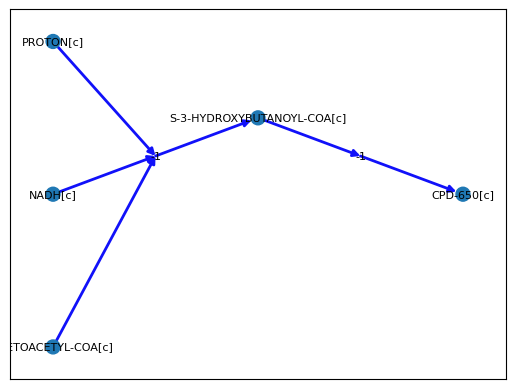

In [33]:
plot_metabolite_fluxes(
    model,
    "S-3-HYDROXYBUTANOYL-COA[c]",
    label_reactions="fluxes",
    include_zeros=False
)

(<networkx.classes.digraph.DiGraph at 0x7f75d00c2600>, <Axes: >)

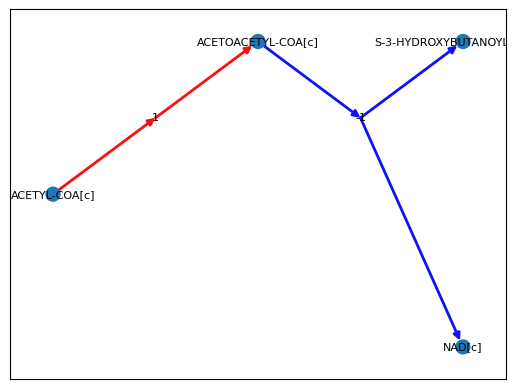

In [34]:
plot_metabolite_fluxes(
    model,
    "ACETOACETYL-COA[c]",
    label_reactions="fluxes",
    include_zeros=False
)

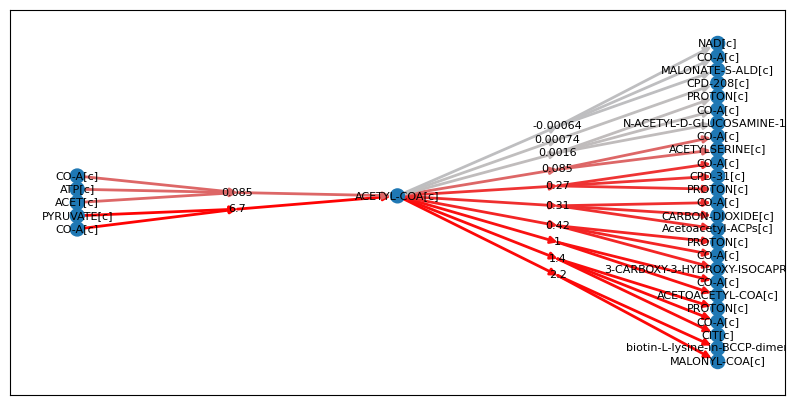

In [35]:
fig, ax = plt.subplots()
plot_metabolite_fluxes(
    model,
    "ACETYL-COA[c]",
    label_reactions="fluxes",
    include_zeros=False,
    ax=ax
)

fig.set_size_inches(10, 5)

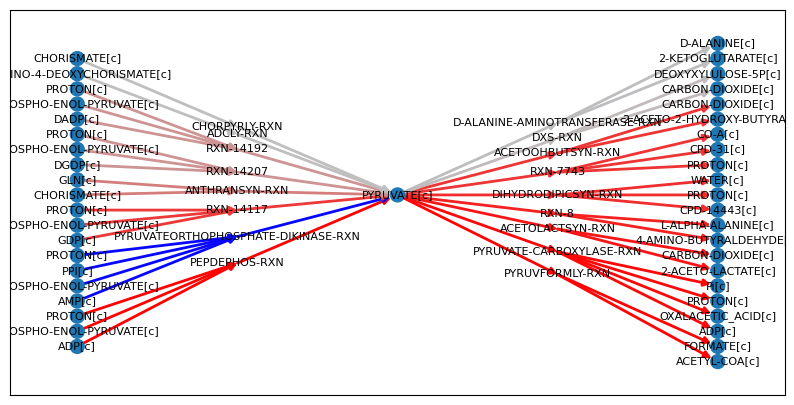

In [36]:
fig, ax = plt.subplots()
plot_metabolite_fluxes(
    model,
    "PYRUVATE[c]",
    label_reactions="names",
    include_zeros=False,
    ax=ax
)

fig.set_size_inches(10, 5)

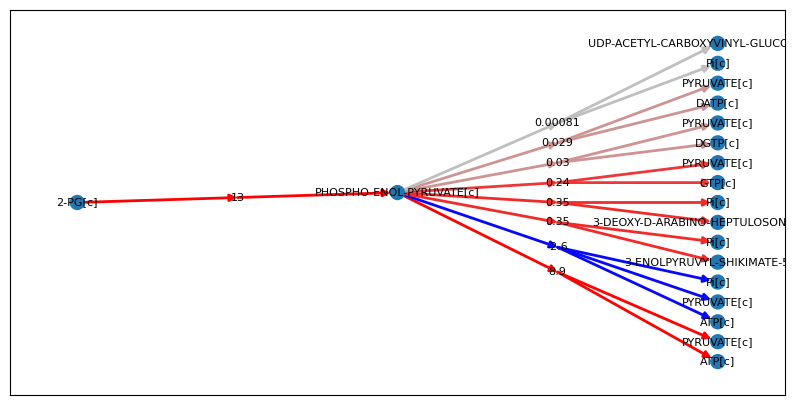

In [37]:
fig, ax = plt.subplots()
plot_metabolite_fluxes(
    model,
    "PHOSPHO-ENOL-PYRUVATE[c]",
    label_reactions="fluxes",
    include_zeros=False,
    ax=ax
)

fig.set_size_inches(10, 5)

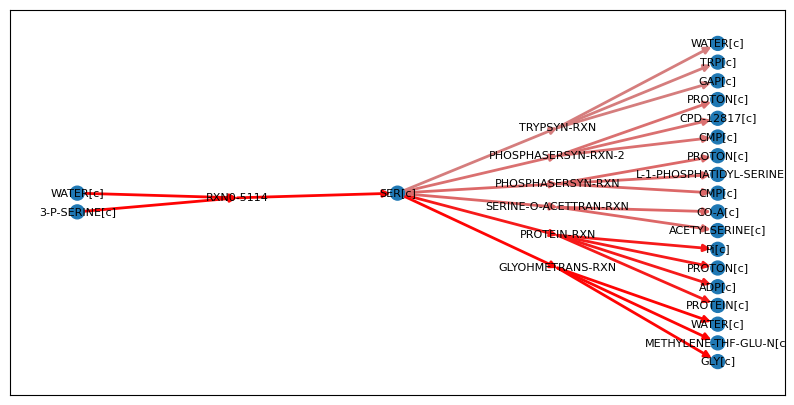

In [38]:
fig, ax = plt.subplots()
plot_metabolite_fluxes(
    model,
    "SER[c]",
    label_reactions="names",
    include_zeros=False,
    ax=ax
)

fig.set_size_inches(10, 5)

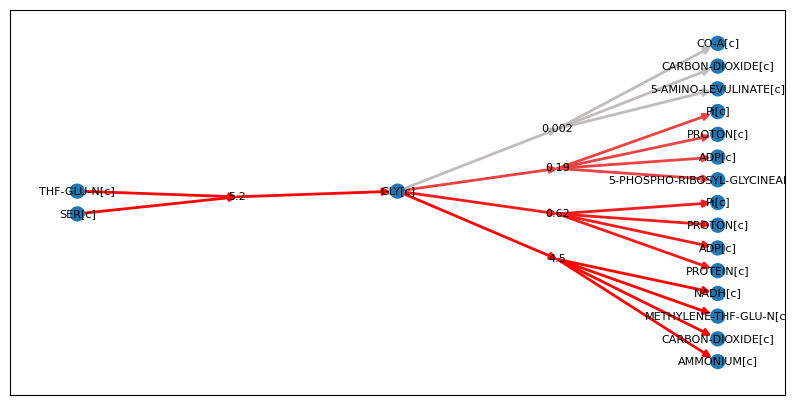

In [39]:
fig, ax = plt.subplots()
plot_metabolite_fluxes(
    model,
    "GLY[c]",
    label_reactions="fluxes",
    include_zeros=False,
    ax=ax
)

fig.set_size_inches(10, 5)

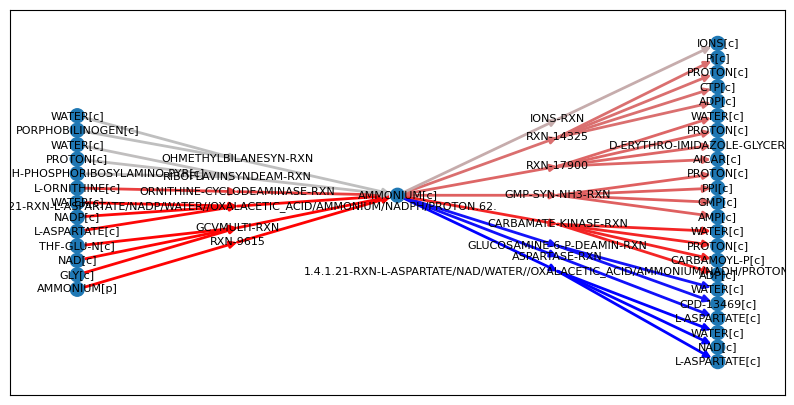

In [40]:
fig, ax = plt.subplots()
plot_metabolite_fluxes(
    model,
    "AMMONIUM[c]",
    label_reactions="names",
    include_zeros=False,
    ax=ax
)

fig.set_size_inches(10, 5)

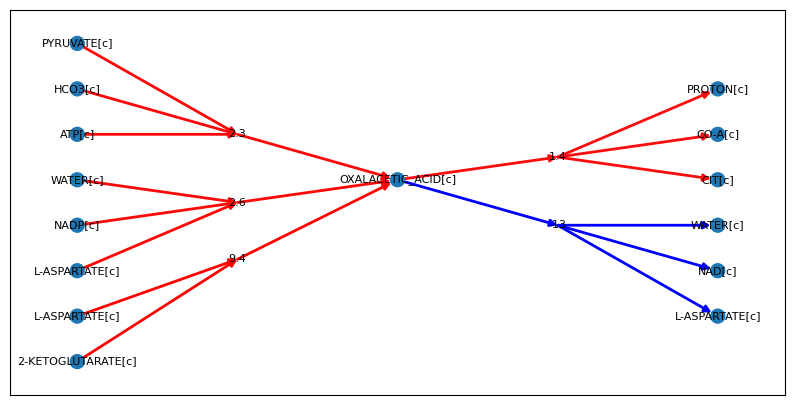

In [41]:
fig, ax = plt.subplots()
plot_metabolite_fluxes(
    model,
    "OXALACETIC_ACID[c]",
    label_reactions="fluxes",
    include_zeros=False,
    ax=ax
)

fig.set_size_inches(10, 5)

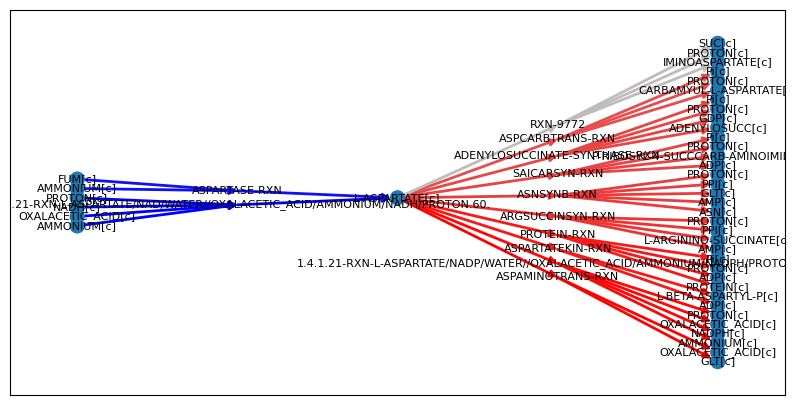

In [42]:
fig, ax = plt.subplots()
plot_metabolite_fluxes(
    model,
    "L-ASPARTATE[c]",
    label_reactions="names",
    include_zeros=False,
    ax=ax
)

fig.set_size_inches(10, 5)

In [43]:
model.reactions

[<Reaction 1-ACYLGLYCEROL-3-P-ACYLTRANSFER-RXN at 0x7f75d4293e90>,
 <Reaction 1.1.1.178-RXN at 0x7f75d42938c0>,
 <Reaction 1.1.1.262-RXN at 0x7f75d42ac7a0>,
 <Reaction 1.1.1.39-RXN at 0x7f75d42ac2c0>,
 <Reaction 1.1.1.8-RXN at 0x7f75d42ac830>,
 <Reaction 1.13.11.15-RXN at 0x7f75d42ad2b0>,
 <Reaction 1.13.11.25-RXN at 0x7f75d42ac1a0>,
 <Reaction 1.13.11.6-RXN at 0x7f75d42ad970>,
 <Reaction 1.14.11.1-RXN at 0x7f75d42ace30>,
 <Reaction 1.2.1.2-RXN at 0x7f75d42ae000>,
 <Reaction 1.2.1.25-RXN at 0x7f75d42ae4e0>,
 <Reaction 1.2.1.27-RXN at 0x7f75d42ae8d0>,
 <Reaction 1.2.7.4-RXN at 0x7f75d42ad760>,
 <Reaction 1.2.7.8-RXN at 0x7f75d42af350>,
 <Reaction 1.3.1.2-RXN at 0x7f75d42ae990>,
 <Reaction 1.3.1.54-RXN at 0x7f75d42afc80>,
 <Reaction 1.4.1.21-RXN-L-ASPARTATE/NAD/WATER//OXALACETIC_ACID/AMMONIUM/NADH/PROTON.60. at 0x7f75d42afc20>,
 <Reaction 1.4.1.21-RXN-L-ASPARTATE/NADP/WATER//OXALACETIC_ACID/AMMONIUM/NADPH/PROTON.62. at 0x7f75d42d0500>,
 <Reaction 1.5.1.15-RXN at 0x7f75d42aed80>,
 <Reacti

In [44]:
# Another key question:
# Can the model grow on acetate with Ethylmalonyl-CoA pathway turned off?
# Below, I show that the answer is no - so that's good.
with model:
    ex_ace.lower_bound = -10

    model.reactions.get_by_id("RXN-12571").bounds = (0, 1000)
    model.reactions.get_by_id("RXN-12572").bounds = (0, 1000)
    model.reactions.get_by_id("RXN-16010").bounds = (0, 1000)
    model.reactions.get_by_id("RXN-16011").bounds = (0, 1000)
    model.reactions.get_by_id("RXN-16012").bounds = (0, 1000)
    model.reactions.get_by_id("RXN-16013").bounds = (0, 1000)
    model.reactions.get_by_id("RXN-22218").knock_out()

    for rxn in eth_CoA_rxns:
        rxn.knock_out()

    sol = model.optimize()
    print(f"Objective value: {sol.objective_value}")
    

Objective value: 0.0


In [45]:
# AHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH
# Running the fixes on glucose *SOMETIMES* passes flux through the ethylmalonyl-CoA pathway,
# and sometimes it doesn't. (That is to say, *most* of the ethylmalonyl-CoA pathway is
# turned on, but not all of it - specifically, ACETYL-COA-ACETYLTRANSFER-RXN, MALATE--COA-LIGASE-RXN, and MALYL-COA-LYASE-RXN
# seem to be always utilized, whereas the rest are not.)
# The objective value is approximately the same in either case, so there is an alternative flux distribution
# that is equally good. Let's force zero flux through the sometimes-unused reactions, and see what the alternative flux distribution is.

with model:
    ex_glc.lower_bound = -10

    model.reactions.get_by_id("RXN-12571").bounds = (0, 1000)
    model.reactions.get_by_id("RXN-12572").bounds = (0, 1000)
    model.reactions.get_by_id("RXN-16010").bounds = (0, 1000)
    model.reactions.get_by_id("RXN-16011").bounds = (0, 1000)
    model.reactions.get_by_id("RXN-16012").bounds = (0, 1000)
    model.reactions.get_by_id("RXN-16013").bounds = (0, 1000)
    model.reactions.get_by_id("RXN-22218").knock_out()

    # Force zero flux through the sometimes-unused reactions
    model.reactions.get_by_id("RXN-8957").bounds = (1,1000)


    sol = model.optimize()
    print(f"Objective value: {sol.objective_value}")
    for rxn in eth_CoA_rxns:
        print(f"{rxn.id} ({rxn.name}): {sol.fluxes[rxn.id]})")

Objective value: 1.1110515561388898
3-HYDROXBUTYRYL-COA-DEHYDRATASE-RXN (3-HYDROXBUTYRYL-COA-DEHYDRATASE-RXN): 0.0)
ACETYL-COA-ACETYLTRANSFER-RXN (ACETYL-COA-ACETYLTRANSFER-RXN): 2.161227980979928)
MALATE--COA-LIGASE-RXN (MALATE--COA-LIGASE-RXN): -1.127420015393972)
MALYL-COA-LYASE-RXN (MALYL-COA-LYASE-RXN): 1.127420015393972)
RXN-16391 (RXN-16391): 1.126676721943425)
RXN-5901 (RXN-5901): 0.0)
RXN-8957 (RXN-8957): 1.126676721943425)
RXN-8958 (RXN-8958): 1.126676721943425)
RXN-8959 (RXN-8959): 1.126676721943425)
RXN-8960 (RXN-8960): 1.1266767219434253)
RXN-8961 (RXN-8961): 1.1266767219434253)


In [46]:
for rxn in model.metabolites.get_by_id("S-3-HYDROXYBUTANOYL-COA[c]").reactions:
    print(f"{rxn.id}: {rxn.flux}\n\t{rxn.reaction}")

RXN-11662: -2.1612279809799277
	NAD[c] + S-3-HYDROXYBUTANOYL-COA[c] <=> ACETOACETYL-COA[c] + NADH[c] + PROTON[c]
RXN-11667: 1.1266767219434255
	S-3-HYDROXYBUTANOYL-COA[c] <=> CROTONYL-COA[c] + WATER[c]
OHBUTYRYL-COA-EPIM-RXN-CPD-650//S-3-HYDROXYBUTANOYL-COA.33.: -1.0345512590365022
	CPD-650[c] <=> S-3-HYDROXYBUTANOYL-COA[c]
3-HYDROXYBUTYRYL-COA-DEHYDROGENASE-RXN: 0.0
	ACETOACETYL-COA[c] + NADPH[c] + PROTON[c] --> NADP[c] + S-3-HYDROXYBUTANOYL-COA[c]


In [47]:
# Okay, now let's see why the ethylmalonyl-CoA pathway runs when growing on glucose.
with model:
    ex_glc.lower_bound = -10

    # Fixes (TODO: make these permanent)
    model.reactions.get_by_id("RXN-12571").bounds = (0, 1000)
    model.reactions.get_by_id("RXN-12572").bounds = (0, 1000)
    model.reactions.get_by_id("RXN-16010").bounds = (0, 1000)
    model.reactions.get_by_id("RXN-16011").bounds = (0, 1000)
    model.reactions.get_by_id("RXN-16012").bounds = (0, 1000)
    model.reactions.get_by_id("RXN-16013").bounds = (0, 1000)
    model.reactions.get_by_id("RXN-22218").knock_out()

    # knock out the ethylmalonyl-CoA pathway
    for rxn in eth_CoA_rxns:
        rxn.knock_out()

    sol = model.optimize()
    print(f"Objective value (-Ethylmalonyl-CoA pwy): {sol.objective_value}")
    
model.reactions.get_by_id("PROTEIN-RXN").flux

Objective value (-Ethylmalonyl-CoA pwy): 1.074591609392308


0.6034067372743092

In [48]:
# Evidently, growth rate is a bit higher when the ethylmalonyl-CoA pathway is on.
# This isn't so surprising, but it's a nice confirmation.
#
# I think this is probably because PHB is easier to make with it running.
# To investigate this, let's make the following plot. For each biomass component, plot:
#    - flux of the synthesis reaction, normal conditions
#    - flux of the synthesis reaction, ethylmalonyl-CoA pathway knocked out
#    - maximum achievable flux of the synthesis reaction, exchanges added to vent excess of the other components, normal conditions
#    - maximum achievable flux of the synthesis reaction, exchanges added to vent excess of the other components, ethylmalonyl-CoA pathway knocked out

model.reactions.get_by_id("Rpom_hwa_biomass").metabolites

component_reactions = {
    "PROTEIN[c]": "PROTEIN-RXN",
    "PHB-STORAGE[c]": "PHB-STORAGE-RXN",
    "LIPID[c]": "LIPID-RXN",
    "RNA[c]": "RNA-RXN",
    "DNA[c]": "DNA-RXN",
    "MUREIN[c]": "MUREIN-RXN",
    "COFACTORS[c]": "COFACTOR-RXN",
    "IONS[c]": "IONS-RXN"
    
}

flux_normal = []
flux_kos = []
max_flux_normal = []
max_flux_kos = []
for component, rxn in component_reactions.items():
    rxn = model.reactions.get_by_id(rxn)
    
    with model:
        ex_glc.lower_bound = -10

        # Fixes (TODO: make these permanent)
        model.reactions.get_by_id("RXN-12571").bounds = (0, 1000)
        model.reactions.get_by_id("RXN-12572").bounds = (0, 1000)
        model.reactions.get_by_id("RXN-16010").bounds = (0, 1000)
        model.reactions.get_by_id("RXN-16011").bounds = (0, 1000)
        model.reactions.get_by_id("RXN-16012").bounds = (0, 1000)
        model.reactions.get_by_id("RXN-16013").bounds = (0, 1000)
        model.reactions.get_by_id("RXN-22218").knock_out()
        
        # Get the flux of the reaction, normal conditions
        sol = model.optimize()
        flux_normal.append(sol.fluxes[rxn.id])
    
        # Knock out the ethylmalonyl-CoA pathway and get the flux of the reaction
        with model:
            for eth_rxn in eth_CoA_rxns:
                eth_rxn.knock_out()
            sol = model.optimize()
            flux_kos.append(sol.fluxes[rxn.id])
    
        # Get the maximum achievable flux of the reaction, normal conditions
        with model:
            # Set the objective to the reaction
            sol.objective = rxn

            # Add exchange reactions to vent all other components
            for other_component, other_rxn in component_reactions.items():
                if other_component == component:
                    continue
                model.add_boundary(
                    model.metabolites.get_by_id(other_component),
                    type="sink",
                    lb=0,
                    ub=1000
                )

            sol = model.optimize()
            max_flux_normal.append(sol.fluxes[rxn.id])
    
        # Get the maximum achievable flux of the reaction, ethylmalonyl-CoA pathway knocked out
        with model:
            # Set the objective to the reaction
            sol.objective = rxn

            # Add exchange reactions to vent all other components
            for other_component, other_rxn in component_reactions.items():
                if other_component == component:
                    continue
                model.add_boundary(
                    model.metabolites.get_by_id(other_component),
                    type="sink",
                    lb=0,
                    ub=1000
                )
            
            # Knock out the ethylmalonyl-CoA pathway
            for eth_rxn in eth_CoA_rxns:
                eth_rxn.knock_out()

            sol = model.optimize()
            max_flux_kos.append(sol.fluxes[rxn.id])

flux_normal = np.array(flux_normal)
flux_kos = np.array(flux_kos)
max_flux_normal = np.array(max_flux_normal)
max_flux_kos = np.array(max_flux_kos)


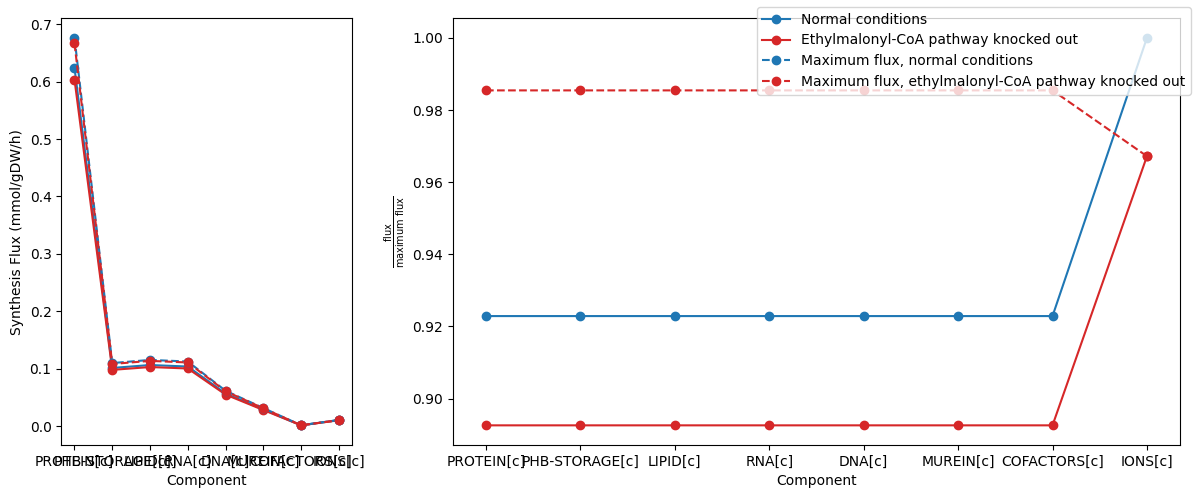

In [49]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [4, 10]})

ax1.plot(component_reactions.keys(),
         flux_normal,
         label="Normal conditions",
         color="tab:blue",
         marker="o")
ax1.plot(component_reactions.keys(),
         flux_kos,
         label="Ethylmalonyl-CoA pathway knocked out",
         color="tab:red",
         marker="o")

ax1.plot(component_reactions.keys(),
         max_flux_normal,
         label="Maximum flux, normal conditions",
         color="tab:blue",
         linestyle="--",
         marker="o")

ax1.plot(component_reactions.keys(),
         max_flux_kos,
         label="Maximum flux, ethylmalonyl-CoA pathway knocked out",
         color="tab:red",
         linestyle="--",
         marker="o")

ax2.plot(component_reactions.keys(),
         flux_normal / max_flux_normal,
         color="tab:blue",
         marker="o")
ax2.plot(component_reactions.keys(),
         flux_kos / max_flux_normal,
         color="tab:red",
         marker="o")
ax2.plot(component_reactions.keys(),
         max_flux_kos / max_flux_normal,
         color="tab:red",
         linestyle="--",
         marker="o")

ax1.set_xlabel("Component")
ax1.set_ylabel("Synthesis Flux (mmol/gDW/h)")
ax2.set_xlabel("Component")
ax2.set_ylabel(r"$\frac{\text{flux}}{\text{maximum flux}}$")
fig.legend()
fig.set_size_inches(12, 5)
fig.tight_layout()

In [50]:
# So it looks like no one component is responsible for the difference in growth rate.
# Instead, all components globally shift down at a constant factor of their maximum rate
# when the ethylmalonyl-CoA pathway is knocked out.
# This points to a global effect of the ethylmalonyl-CoA pathway on metabolism, rather than a specific
# effect on a single component.
# Hypotheses:
# 1. The ethylmalonyl-CoA pathway is a sink for excess acetyl-CoA
# 2. The ethylmalonyl-CoA pathway more efficiently generates some currency metabolite
#
# For the first hypothesis, we can add a sink for acetyl-CoA and see if the flux through it increases when the ethylmalonyl-CoA pathway is knocked out.

with model:
    acetyl_coa = model.metabolites.get_by_id("ACETYL-COA[c]")
    acetyl_coa_sk = model.add_boundary(
        acetyl_coa,
        type="sink",
        lb=0,
        ub=1000
    )

    ex_glc.lower_bound = -10

    # Fixes (TODO: make these permanent)
    model.reactions.get_by_id("RXN-12571").bounds = (0, 1000)
    model.reactions.get_by_id("RXN-12572").bounds = (0, 1000)
    model.reactions.get_by_id("RXN-16010").bounds = (0, 1000)
    model.reactions.get_by_id("RXN-16011").bounds = (0, 1000)
    model.reactions.get_by_id("RXN-16012").bounds = (0, 1000)
    model.reactions.get_by_id("RXN-16013").bounds = (0, 1000)
    model.reactions.get_by_id("RXN-22218").knock_out()

    # Knock out the ethylmalonyl-CoA pathway
    for eth_rxn in eth_CoA_rxns:
        eth_rxn.knock_out()

    # Optimize
    sol = model.optimize()

acetyl_coa_sk

Reaction identifier,SK_ACETYL-COA[c]
Name,acetyl-CoA sink
Memory address,0x7f75ca78f5c0
Stoichiometry,ACETYL-COA[c] --> acetyl-CoA -->
GPR,
Lower bound,0
Upper bound,1000


In [51]:
# Disproved, as the flux through the acetyl-CoA sink is 0.
# For hypothesis 2, the currency metabolite of interest could be ATP or NADP.
with model:
    ex_glc.lower_bound = -10
    
    # Fixes (TODO: make these permanent)
    model.reactions.get_by_id("RXN-12571").bounds = (0, 1000)
    model.reactions.get_by_id("RXN-12572").bounds = (0, 1000)
    model.reactions.get_by_id("RXN-16010").bounds = (0, 1000)
    model.reactions.get_by_id("RXN-16011").bounds = (0, 1000)
    model.reactions.get_by_id("RXN-16012").bounds = (0, 1000)
    model.reactions.get_by_id("RXN-16013").bounds = (0, 1000)
    model.reactions.get_by_id("RXN-22218").knock_out()

    sol = model.optimize()

    for rxn in eth_CoA_rxns:
        print(f"{rxn.id} ({rxn.name}): {sol.fluxes[rxn.id]})")

3-HYDROXBUTYRYL-COA-DEHYDRATASE-RXN (3-HYDROXBUTYRYL-COA-DEHYDRATASE-RXN): 0.0)
ACETYL-COA-ACETYLTRANSFER-RXN (ACETYL-COA-ACETYLTRANSFER-RXN): 1.0345512590362675)
MALATE--COA-LIGASE-RXN (MALATE--COA-LIGASE-RXN): -0.0007432934504821508)
MALYL-COA-LYASE-RXN (MALYL-COA-LYASE-RXN): 0.0007432934504821508)
RXN-16391 (RXN-16391): 0.0)
RXN-5901 (RXN-5901): 0.0)
RXN-8957 (RXN-8957): 0.0)
RXN-8958 (RXN-8958): 0.0)
RXN-8959 (RXN-8959): 0.0)
RXN-8960 (RXN-8960): 0.0)
RXN-8961 (RXN-8961): 0.0)


# Using Socks plots to compare ethCoA on/off modes of glucose

In [52]:
# Get flux distributions for the ethylmalonyl-CoA pathway on/mostly-off

with model:
    ex_glc.lower_bound = -10

    model.reactions.get_by_id("RXN-12571").bounds = (0, 1000)
    model.reactions.get_by_id("RXN-12572").bounds = (0, 1000)
    model.reactions.get_by_id("RXN-16010").bounds = (0, 1000)
    model.reactions.get_by_id("RXN-16011").bounds = (0, 1000)
    model.reactions.get_by_id("RXN-16012").bounds = (0, 1000)
    model.reactions.get_by_id("RXN-16013").bounds = (0, 1000)
    model.reactions.get_by_id("RXN-22218").knock_out()

    # Force zero flux through the sometimes-unused reactions
    model.reactions.get_by_id("RXN-8957").bounds = (0, 0)

    mostly_off_sol = model.optimize()

    # Force flux through the ethylmalonyl-CoA pathway
    model.reactions.get_by_id("RXN-8957").bounds = (1, 1000)
    on_sol = model.optimize()

In [53]:
def get_producing_fluxes(component, fluxes, exclude_precursors=["ATP[c]"]):
    if component.formula is None:  # Recursively get producing flxues for precursors
        # Get precursors
        precursors = []
        for reaction in component.reactions:
            prod_rate = fluxes[reaction.id] * reaction.metabolites[component]
            if prod_rate > 0:
                precursors += [met
                               for met in reaction.metabolites
                               if fluxes[reaction.id] * reaction.metabolites[met] < 0
                               and met.id not in exclude_precursors]
        
        # Get producing fluxes for precursors
        result = {}
        for precursor in precursors:
            precursor_fluxes = get_producing_fluxes(precursor, fluxes)
            for reaction_id, flux in precursor_fluxes.items():
                if reaction_id in result:
                    result[reaction_id] += flux
                else:
                    result[reaction_id] = flux
        return result
    else:
        # Get reactions that produce the component
        producing_reactions = {}
        for reaction in component.reactions:
            prod_rate = fluxes[reaction.id] * reaction.metabolites[component]
            if prod_rate > 0:
                producing_reactions[reaction.id] = prod_rate

        return producing_reactions


component = "PROTEIN[c]"
component = model.metabolites.get_by_id(component)

# Get reactions that produce the component
get_producing_fluxes(component, mostly_off_sol.fluxes)

{'RXN-8': 0.4750733008596702,
 'ARGSUCCINLYA-RXN': 0.2730877950896142,
 'ASNSYNB-RXN': 0.4451045227310819,
 'ASPARTASE-RXN': 11.333757745327954,
 'ACSERLY-RXN': 0.08519052952683395,
 'L-GLN-FRUCT-6-P-AMINOTRANS-RXN-FRUCTOSE-6P/GLN//CPD-13469/GLT.31.': 0.8371948404347205,
 'ASPAMINOTRANS-RXN': 9.412531345137815,
 'PRPPAMIDOTRANS-RXN': 0.1858410192712337,
 'GABATRANSAM-RXN': 0.4750733008596701,
 'FGAMSYN-RXN': 0.1858410192712337,
 'GLYOHMETRANS-RXN': 5.2238390295720105,
 'HISTALDEHYD-RXN': 0.08746616377672466,
 'BRANCHED-CHAINAMINOTRANSFERILEU-RXN': 0.268228769059798,
 'BRANCHED-CHAINAMINOTRANSFERLEU-RXN': 0.41594944258620664,
 'DIAMINOPIMDECARB-RXN': 0.3168208772899164,
 'HOMOCYSMET-RXN': 0.14213723693817962,
 'RXN-10814': 0.2983560242465799,
 'ORNITHINE-CYCLODEAMINASE-RXN': 0.20408740832220446,
 'RXN0-5114': 5.715205098849674,
 'THRESYN-RXN': 0.2342146628851065,
 'RXN0-2382': 0.05247988318400643,
 'RXN-15200': 0.12731147102313883,
 'BRANCHED-CHAINAMINOTRANSFERVAL-RXN': 0.39068121405312

In [54]:
from matplotlib.colors import hsv_to_rgb

# utility function to get good dimensions for a grid
def nearest_rect(num):
    width = int(num**0.5)
    height = num // width
    while width * height != num:
        width += 1
        height = num // width
    return width, height

# utility function to convert a name to a color
def name_to_color(name, N = 17):
    theta_1 = (hash(name) % N) / N
    theta_2 = (hash(theta_1) % N) / N
    theta_3 = (hash(theta_2) % N) / N

    h = theta_1
    s = 0.6 + 0.4 * theta_2
    v = 0.5 + 0.4 * theta_3
    return hsv_to_rgb([h,s,v])

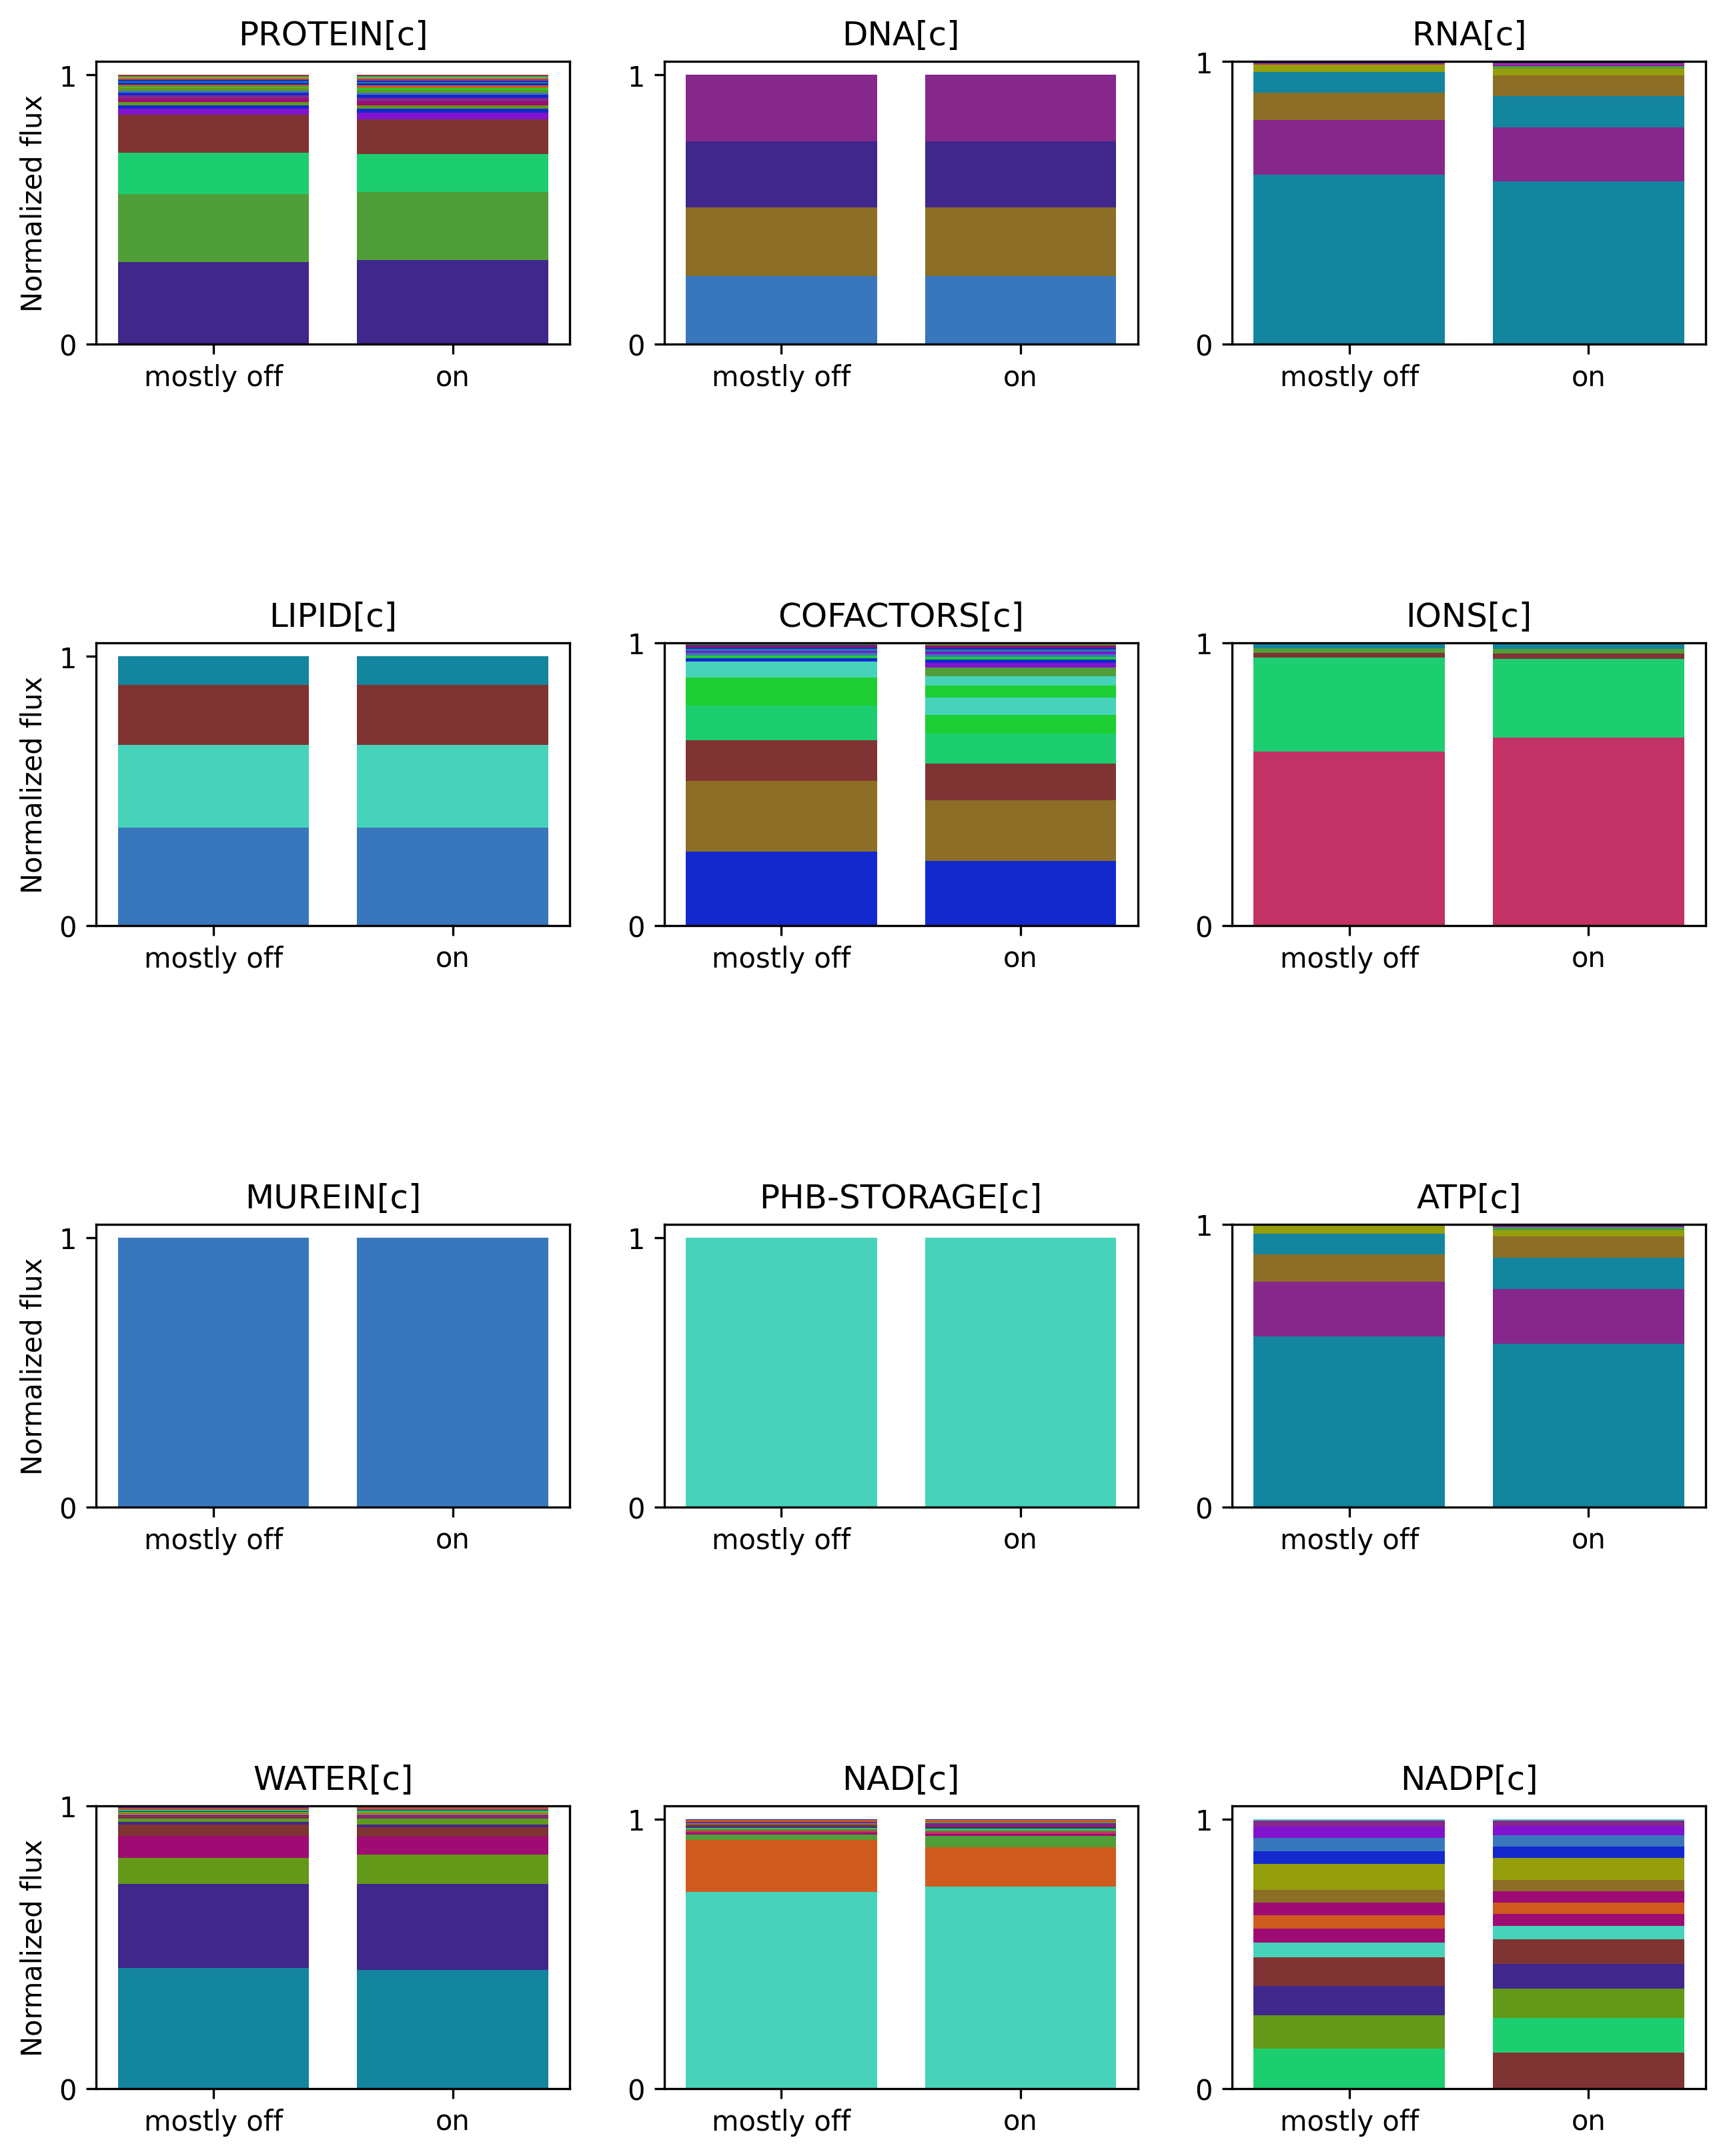

In [55]:
def production_comparison_plot(component, *flux_vectors, exclude_precursors=None, ax=None):
    if ax is None:
        ax = plt.gca()
    
    if exclude_precursors is None:
        exclude_precursors = []
    
    # Get producing fluxes
    producing_fluxes = [get_producing_fluxes(component, fluxes, exclude_precursors=exclude_precursors) for fluxes in flux_vectors]

    # Get producing reaction ids and fluxes for each vector,
    # Normalizing fluxes to sum to 1
    reaction_ids = [list(producing_flux_set.keys()) for producing_flux_set in producing_fluxes]
    fluxes = [np.array(list(producing_flux_set.values())) / sum(producing_flux_set.values())
              for producing_flux_set in producing_fluxes]

    # Sort by flux
    for i in range(len(flux_vectors)):
        reaction_ids[i] = sorted(reaction_ids[i], key=lambda x: producing_fluxes[i][x], reverse=True)
        fluxes[i] = sorted(fluxes[i], reverse=True)

    # Plot, stacking bars
    for x, (prod_reactions, prod_fluxes) in enumerate(zip(reaction_ids, fluxes)):
        total = 0
        for reaction_id, flux in zip(prod_reactions, prod_fluxes):
            ax.bar(x,
                   flux,
                   bottom=total,
                   label=reaction_id,
                   color=name_to_color(reaction_id))
            total += flux

biomass_requirements = [met for met, coeff in model.reactions.get_by_id("Rpom_hwa_biomass").metabolites.items() if coeff < 0]

width, height = nearest_rect(len(biomass_requirements))
fig, axs = plt.subplots(height, width, dpi=300.)

for i, met in enumerate(biomass_requirements):
    production_comparison_plot(
        met,
        mostly_off_sol.fluxes,
        on_sol.fluxes,
        exclude_precursors=["ATP[c]"] if met.id != "RNA[c]" else None, ax = axs.flat[i])
    axs.flat[i].set_title(met.id)
    axs.flat[i].set_xticks([0, 1], ["mostly off", "on"])
    axs.flat[i].set_yticks([0, 1])

for ax in axs[:,0]:
    ax.set_ylabel("Normalized flux")

fig.tight_layout()
fig.set_size_inches(3 * width, 3 * height)

In [56]:
get_producing_fluxes(model.metabolites.get_by_id("ATP[c]"), mostly_off_sol.fluxes, exclude_precursors=[])

{'PEPDEPHOS-RXN': 6.938063350679604,
 'PHOSGLYPHOS-RXN': 18.234878616744393,
 'ADENYL-KIN-RXN': 0.4060451805409226,
 'ATPSYN-RXN': 56.64913713339206,
 'PYRUVATEORTHOPHOSPHATE-DIKINASE-RXN': 2.594717319707543,
 'MALATE--COA-LIGASE-RXN': 0.0007432934504821025,
 'FORMATETHFLIG-RXN': 9.062748673602645}

In [57]:
get_producing_fluxes(model.metabolites.get_by_id("ATP[c]"), on_sol.fluxes, exclude_precursors=[])

{'PEPDEPHOS-RXN': 10.39981727875935,
 'PHOSGLYPHOS-RXN': 18.234878616744382,
 'ADENYL-KIN-RXN': 0.40604518054092226,
 'ATPSYN-RXN': 54.64913713339205,
 'PYRUVATEORTHOPHOSPHATE-DIKINASE-RXN': 2.1329633916277904,
 'SUCCCOASYN-RXN': 0.5382460719202423,
 'MALATE--COA-LIGASE-RXN': 1.0007432934504816,
 'FORMATETHFLIG-RXN': 7.06274867360264}

(-50.0, 20.0)

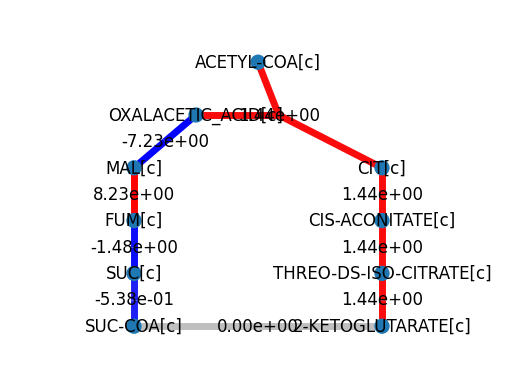

In [58]:
# SUCCCOASYN-RXN is not operating in the mostly-off case!!!
# This is a TCA cycle reaction - clearly something is off with the TCA cycle in the mostly-off case.
# Let's look at the TCA cycle and see if any other reactions are not operating.

import networkx as nx

tca = nx.Graph()

# Metabolites
tca.add_nodes_from([
    ("ACETYL-COA[c]", {"pos": (0, 10)}),
    ("CIT[c]", {"pos": (10, -10)}),
    ("CIS-ACONITATE[c]", {"pos": (10, -20)}),
    ("THREO-DS-ISO-CITRATE[c]", {"pos": (10, -30)}),
    ("2-KETOGLUTARATE[c]", {"pos": (10, -40)}),
    ("SUC-COA[c]", {"pos": (-10, -40)}),
    ("SUC[c]", {"pos": (-10, -30)}),
    ("FUM[c]", {"pos": (-10, -20)}),
    ("MAL[c]", {"pos": (-10, -10)}),
    ("OXALACETIC_ACID[c]", {"pos": (-5, 0)}),
])

# Reactions
tca_reactions = ["CITSYN-RXN",
                  "ACONITATEDEHYDR-RXN",
                  "ACONITATEHYDR-RXN",
                  "ISOCITDEH-RXN",
                  "2OXOGLUTARATEDEH-RXN",
                  "SUCCCOASYN-RXN",
                  "RXN-14970",
                  "FUMHYDR-RXN",
                  "MALATE-DEH-RXN"]

fig, ax = plt.subplots()
plot_pathway(model, tca, tca_reactions, ax, sol=on_sol)
ax.set_xlim(-20, 20)
ax.set_ylim(-50, 20)

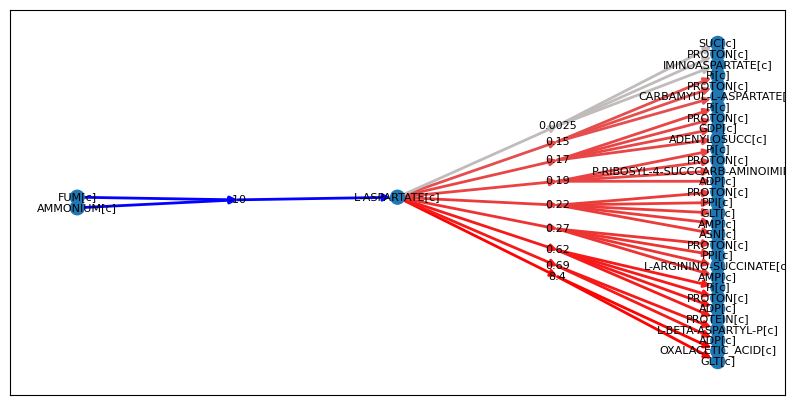

In [59]:
fig, ax = plt.subplots()
plot_metabolite_fluxes(
    model,
    "L-ASPARTATE[c]",
    label_reactions="fluxes",
    include_zeros=False,
    sol=on_sol,
    ax=ax
)
fig.set_size_inches(10, 5)

(<networkx.classes.digraph.DiGraph at 0x7f75c9f1f560>, <Axes: >)

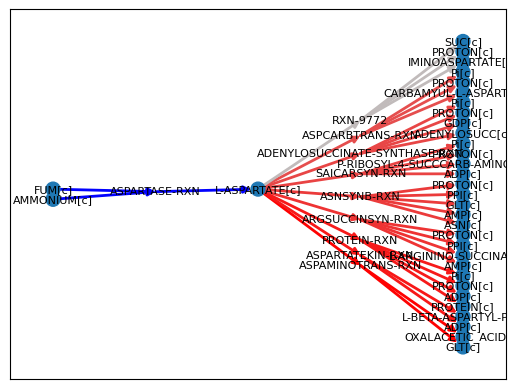

In [60]:
plot_metabolite_fluxes(
    model,
    "L-ASPARTATE[c]",
    label_reactions="names",
    include_zeros=False,
    sol=on_sol
)

In [61]:
from cobra.flux_analysis import find_blocked_reactions, flux_variability_analysis

with model:
    ex_glc.lower_bound = -10

    model.reactions.get_by_id("RXN-12571").bounds = (0, 1000)
    model.reactions.get_by_id("RXN-12572").bounds = (0, 1000)
    model.reactions.get_by_id("RXN-16010").bounds = (0, 1000)
    model.reactions.get_by_id("RXN-16011").bounds = (0, 1000)
    model.reactions.get_by_id("RXN-16012").bounds = (0, 1000)
    model.reactions.get_by_id("RXN-16013").bounds = (0, 1000)
    model.reactions.get_by_id("RXN-22218").knock_out()

    fva = flux_variability_analysis(model)

fva["reaction"] = [model.reactions.get_by_id(rxn).reaction for rxn in fva.index]
fva["pathways"] = [model.reactions.get_by_id(rxn).annotation.get("pathways", []) for rxn in fva.index]
fva["difference"] = fva["maximum"] - fva["minimum"]
fva["sign difference"] = (np.sign(fva["maximum"]) - np.sign(fva["minimum"])) != 0

fva = fva[np.abs(fva["difference"]) > 1e-10]
fva = fva.sort_values("sign difference", ascending=False)
fva = fva.sort_values("difference", ascending=False)
fva.to_clipboard()
fva

,minimum,maximum,reaction,pathways,difference,sign difference
PPENTOMUT-RXN-RIBOSE-1P//CPD-16551.21.,-1.000000e+03,1.000000e+03,RIBOSE-1P[c] <=> CPD-16551[c],PWY0-1296,2.000000e+03,True
RXN-11667,-1.000000e+03,1.000000e+03,S-3-HYDROXYBUTANOYL-COA[c] <=> CROTONYL-COA[c]...,PWY0-1337,2.000000e+03,True
RXN-161,-1.000000e+03,1.000000e+03,BUTANOL[c] + NAD[c] <=> BUTANAL[c] + NADH[c] +...,[],2.000000e+03,True
RIB5PISOM-RXN-CPD-15895//RIBULOSE-5P.23.,-1.000000e+03,1.000000e+03,RIBULOSE-5P[c] <=> CPD-15895[c],[],2.000000e+03,True
L-LYSINE-AMINOTRANSFERASE-RXN,-1.000000e+03,1.000000e+03,2-KETOGLUTARATE[c] + LYS[c] <=> ALLYSINE[c] + ...,[],2.000000e+03,True
...,...,...,...,...,...,...
RXN-9952,1.179298e+00,1.179298e+00,CPD-2961[c] + NADP[c] --> CARBON-DIOXIDE[c] + ...,OXIDATIVEPENT-PWY,-1.383293e-10,False
TRANS-RXN1G48-17-ZN+2/PROTON//ZN+2/PROTON.25.,3.788686e-04,3.788684e-04,PROTON[p] + ZN+2[p] --> PROTON[c] + ZN+2[c],[],-1.943846e-10,False
ADENPHOSPHOR-RXN,-8.194506e-12,-2.084509e-10,ADENOSINE[c] + Pi[c] <=> ADENINE[c] + RIBOSE-1...,"[PWY-6609, PWY0-1296, P121-PWY]",-2.002564e-10,False
RXN-16909,0.000000e+00,-3.984904e-10,ATP[c] + HCO3[c] --> ADP[c] + CPD-18238[c],[],-3.984904e-10,True


In [62]:
# Get FVA results for (1) mostly off case, and (2) on case.
# Then, check for reactions whose upper/lower bounds are different in the two cases.

with model:
    ex_glc.lower_bound = -10

    model.reactions.get_by_id("RXN-12571").bounds = (0, 1000)
    model.reactions.get_by_id("RXN-12572").bounds = (0, 1000)
    model.reactions.get_by_id("RXN-16010").bounds = (0, 1000)
    model.reactions.get_by_id("RXN-16011").bounds = (0, 1000)
    model.reactions.get_by_id("RXN-16012").bounds = (0, 1000)
    model.reactions.get_by_id("RXN-16013").bounds = (0, 1000)
    model.reactions.get_by_id("RXN-22218").knock_out()

    # Force zero flux through the sometimes-unused reactions
    model.reactions.get_by_id("RXN-8957").bounds = (0, 0)

    mostly_off_fva = flux_variability_analysis(model)

    # Force flux through the ethylmalonyl-CoA pathway
    model.reactions.get_by_id("RXN-8957").bounds = (1, 1000)
    on_fva =flux_variability_analysis(model)

In [63]:
import pandas as pd

comp_fva = mostly_off_fva.join(
    on_fva, how="outer", lsuffix="_mostly_off", rsuffix="_on")

# Calculate proportion of overlap between the two ranges
overlap = [
    max(min(row["maximum_mostly_off"], row["maximum_on"]) -
        max(row["minimum_mostly_off"], row["minimum_on"]),
        0)
    for _, row in comp_fva.iterrows()]
total_length = [
    row["maximum_mostly_off"] - row["minimum_mostly_off"] + row["maximum_on"] - row["minimum_on"]
    for _, row in comp_fva.iterrows()
]
comp_fva["overlap"] = [2 * o / l for o, l in zip(overlap, total_length)]

# Calculate "distance" between the two ranges abs(min1 - min2) + abs(max1 - max2)
distance = [
    abs(row["minimum_mostly_off"] - row["minimum_on"]) +
    abs(row["maximum_mostly_off"] - row["maximum_on"])
    for _, row in comp_fva.iterrows()
]
comp_fva["distance"] = distance

# Filter to only include reactions with overlap < 0.9, distance > 0.1
comp_fva = comp_fva[(comp_fva["overlap"] < 0.9) & (comp_fva["distance"] > 0.000000001)]

# Add reaction information
comp_fva = comp_fva.reset_index().rename(columns={"index": "ID"})
comp_fva["reaction"] = [model.reactions.get_by_id(rxn).reaction for rxn in comp_fva["ID"]]
comp_fva["pathways"] = [model.reactions.get_by_id(rxn).annotation.get("pathways", []) for rxn in comp_fva["ID"]]

# Sort
comp_fva = comp_fva.sort_values("distance", ascending=False).sort_values("overlap", ascending=True)
comp_fva.to_clipboard(index=False)
comp_fva

/tmp/ipykernel_30380/630356614.py:16: RuntimeWarning: invalid value encountered in scalar divide
  comp_fva["overlap"] = [2 * o / l for o, l in zip(overlap, total_length)]


,ID,minimum_mostly_off,maximum_mostly_off,minimum_on,maximum_on,overlap,distance,reaction,pathways
10,Htex,1.471272e+02,1.471358e+02,138.113747,139.135836,0.000000,1.701341e+01,PROTON[e] <=> PROTON[p],[]
6,ATPSYN-RXN,-5.664914e+01,-5.664914e+01,-54.649137,-54.395784,0.000000,4.253353e+00,ATP[c] + 3.0 PROTON[c] + WATER[c] <=> ADP[c] +...,PWY-7980
13,METHENYLTHFCYCLOHYDRO-RXN,9.522145e+00,9.522145e+00,7.268791,7.522145,0.000000,4.253353e+00,5-10-METHENYL-THF-GLU-N[c] + WATER[c] <=> FORM...,"[PWY-8303, PWY-6613, 1CMET2-PWY, PWY-1722]"
7,FORMATETHFLIG-RXN,-9.062749e+00,-9.062749e+00,-7.062749,-6.809395,0.000000,4.253353e+00,ATP[c] + FORMATE[c] + THF-GLU-N[c] <=> ADP[c] ...,"[PWY-2161, PWY-8303, PWY-1722]"
2,1.6.99.5-RXN-NADH/UBIQUINONE-10/PROTON//NAD/CP...,3.879265e+01,3.879265e+01,36.539293,36.792647,0.000000,4.253353e+00,NADH[c] + 5.0 PROTON[c] + UBIQUINONE-10[c] <=>...,[]
1,1.5.5.1-RXN-ETF-Reduced/UBIQUINONE-10//ETF-Oxi...,1.671333e-01,1.671333e-01,1.167133,1.293810,0.000000,2.126677e+00,ETF-Reduced[c] + UBIQUINONE-10[c] --> CPD-9958...,[]
5,ACETYL-COA-ACETYLTRANSFER-RXN,1.034551e+00,1.034551e+00,2.034551,2.161228,0.000000,2.126677e+00,2.0 ACETYL-COA[c] <=> ACETOACETYL-COA[c] + CO-...,"[PWY-5741, PWY1-3, PWY0-1337]"
8,GCVMULTI-RXN,4.470402e+00,4.470402e+00,3.343726,3.470402,0.000000,2.126677e+00,GLY[c] + NAD[c] + THF-GLU-N[c] --> AMMONIUM[c]...,"[PWY-8303, 1CMET2-PWY]"
17,PGLYCDEHYDROG-RXN,5.715205e+00,5.715205e+00,4.588528,4.715205,0.000000,2.126677e+00,G3P[c] + NAD[c] <=> 3-P-HYDROXYPYRUVATE[c] + N...,"[SERSYN-PWY, SER-GLYSYN-PWY]"
19,PSERTRANSAM-RXN,5.715205e+00,5.715205e+00,4.588528,4.715205,0.000000,2.126677e+00,3-P-HYDROXYPYRUVATE[c] + GLT[c] --> 2-KETOGLUT...,"[SERSYN-PWY, SER-GLYSYN-PWY]"


In [64]:
model.reactions.get_by_id("RXN-14970")

Reaction identifier,RXN-14970
Name,RXN-14970
Memory address,0x7f75d39c8440
Stoichiometry,CPD-9958[c] + FUM[c] <-- SUC[c] + UBIQUINONE-10[c] ubiquinol-10 + fumarate <-- succinate + ubiquinone-10
GPR,
Lower bound,-1000.0
Upper bound,0.0


In [65]:
on_sol.fluxes["SUCCCOASYN-RXN"], mostly_off_sol.fluxes["SUCCCOASYN-RXN"]

(-0.5382460719202423, 0.0)

In [66]:
len(model.reactions)

1923

In [67]:

ecoli = load_model("iJO1366")

NameError: name 'load_model' is not defined

In [ ]:
for rxn in ecoli.metabolites.get_by_id("2pg_c").reactions:
    print(f"{rxn.id} ({rxn.name}): {rxn.reaction}")

PGM (Phosphoglycerate mutase): 2pg_c <=> 3pg_c
GLYCK2 (Glycerate kinase): atp_c + glyc__R_c --> 2pg_c + adp_c + h_c
ENO (Enolase): 2pg_c <=> h2o_c + pep_c


In [ ]:
model.reactions.get_by_id("RXN-5901")

Reaction identifier,RXN-5901
Name,RXN-5901
Memory address,0x7fbe9eb2f620
Stoichiometry,CPD-650[c] + NADP[c] <-- ACETOACETYL-COA[c] + NADPH[c] + PROTON[c] (3R)-3-hydroxybutanoyl-CoA + NADP+ <-- acetoacetyl-CoA + NADPH + H+
GPR,SPO0325
Lower bound,-1000.0
Upper bound,0.0
